# Water Potability Prediction

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
water_data = pd.read_csv('/content/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

1. pH: The pH level of the water.
2. Hardness: Water hardness, a measure of mineral content.
3. Solids: Total dissolved solids in the water.
4. Chloramines: Chloramines concentration in the water.
5. Sulfate: Sulfate concentration in the water.
6. Conductivity: Electrical conductivity of the water.
7. Organic_carbon: Organic carbon content in the water.
8. Trihalomethanes: Trihalomethanes concentration in the water.
9. Turbidity: Turbidity level, a measure of water clarity.
10. Potability: Target variable; indicates water potability with values 1
(potable) and 0 (not potable).

In [13]:
water_data.shape

(3276, 10)

In [14]:
water_data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [15]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [16]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
water_data.duplicated().any()

False

In [24]:
null_df = water_data.isnull().sum().reset_index()
null_df.columns = ['Column', 'Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(water_data),2) * 100
null_df

,Column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


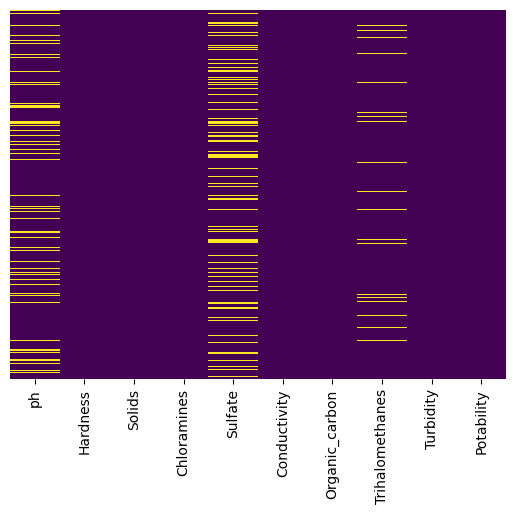

In [25]:
sns.heatmap(water_data.isnull(),yticklabels=False ,cbar=False, cmap='viridis')
plt.show()

### Handling missing values

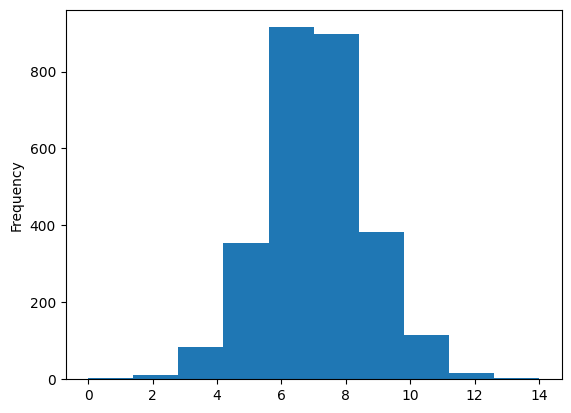

In [27]:
water_data['ph'].plot(kind='hist')
plt.show()

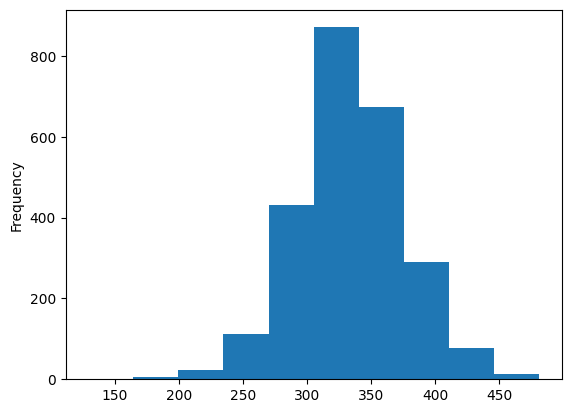

In [28]:
water_data['Sulfate'].plot(kind='hist')
plt.show()

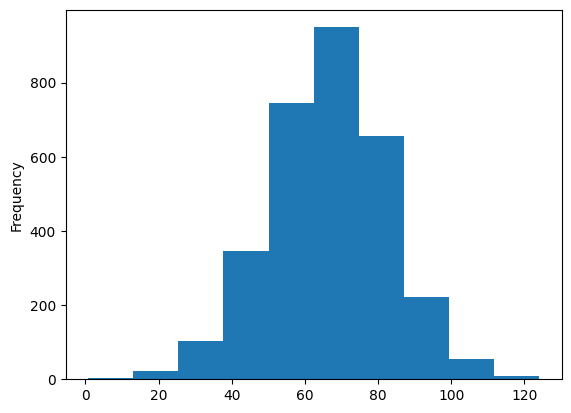

In [29]:
water_data['Trihalomethanes'].plot(kind='hist')
plt.show()

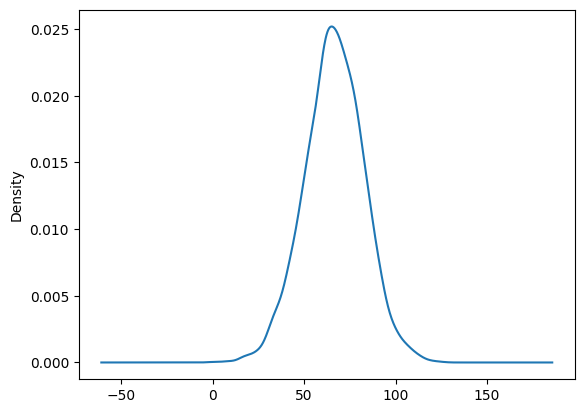

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
water_data['Trihalomethanes'].plot(kind='kde', ax=ax)
plt.show()

### Missing Value Imputation

In [31]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].mean())
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].mean())

In [32]:
water_data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


### Check for Corelation

In [36]:
corr_matrix = water_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


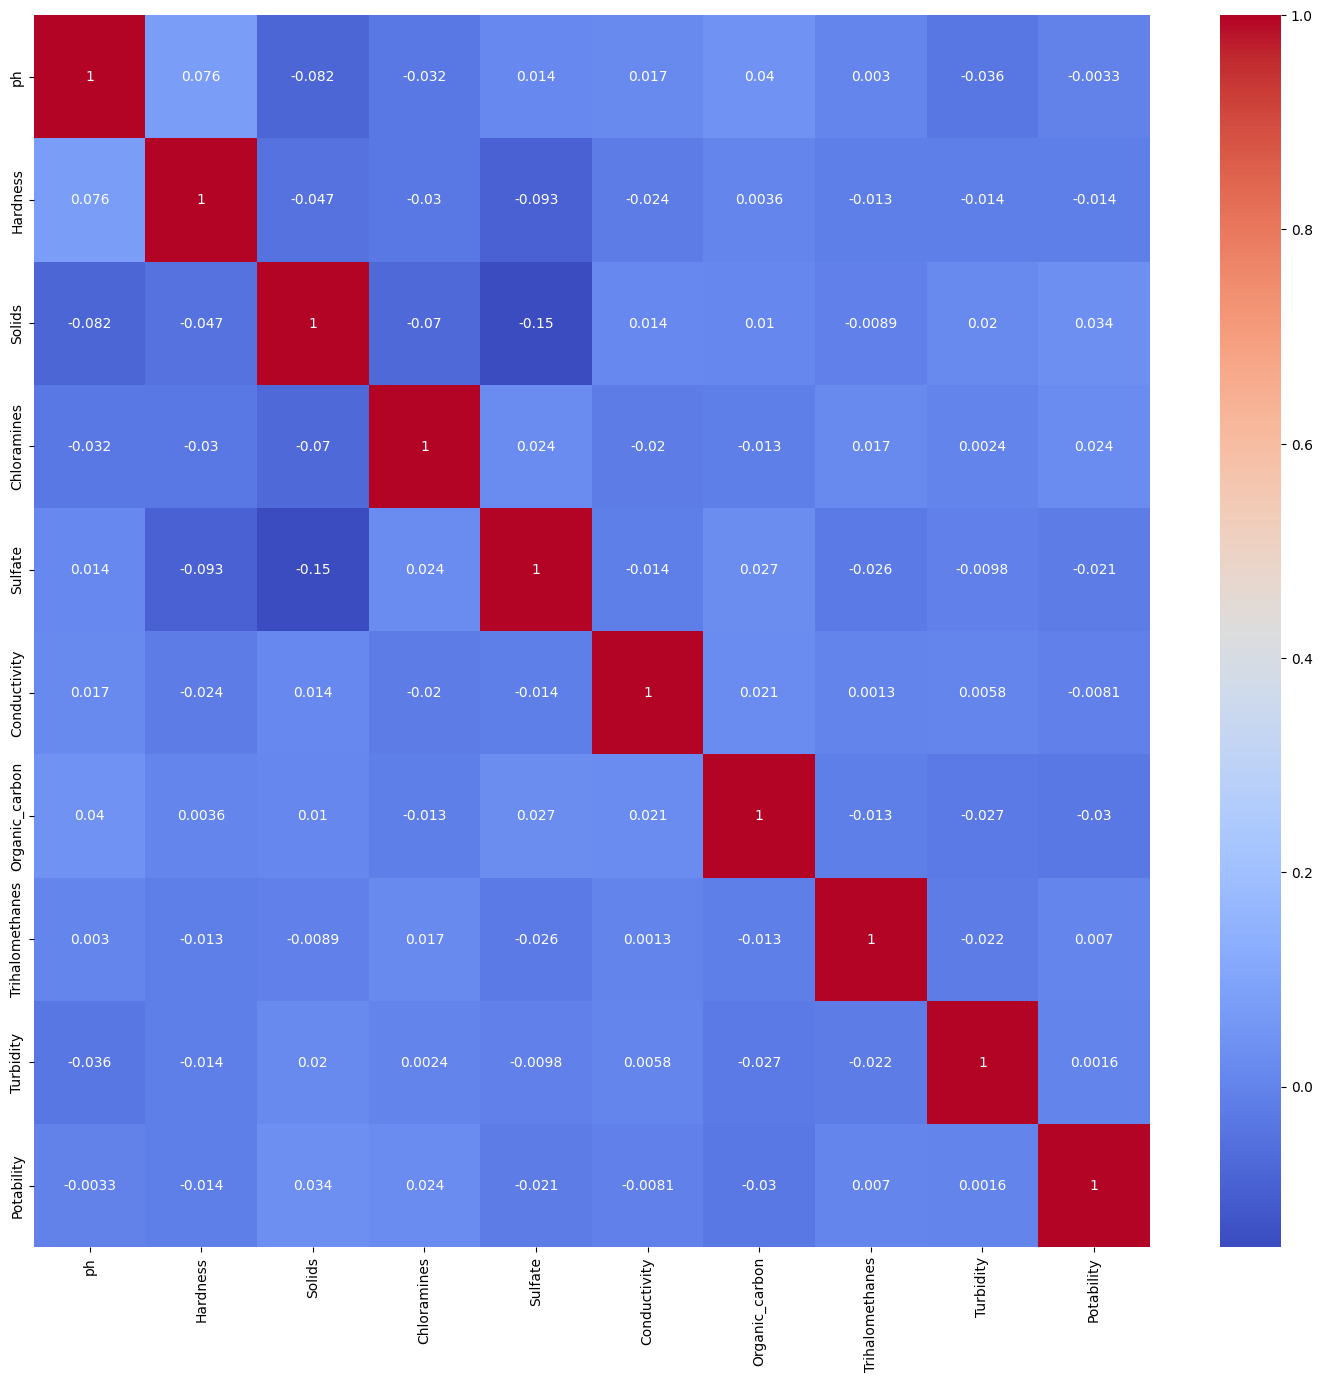

In [37]:
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

(upper-tri) matrix helps identify highly correlated features without checking duplicate values.

In [38]:
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


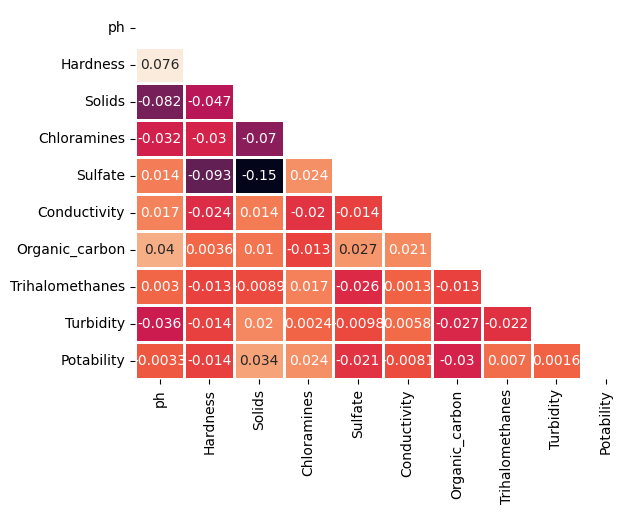

In [39]:
matrix = np.triu(corr_matrix)
sns.heatmap(water_data.corr(), annot=True, linewidths=.8,mask=matrix, cmap='rocket', cbar=False)
plt.show()

### Distribution of Columns

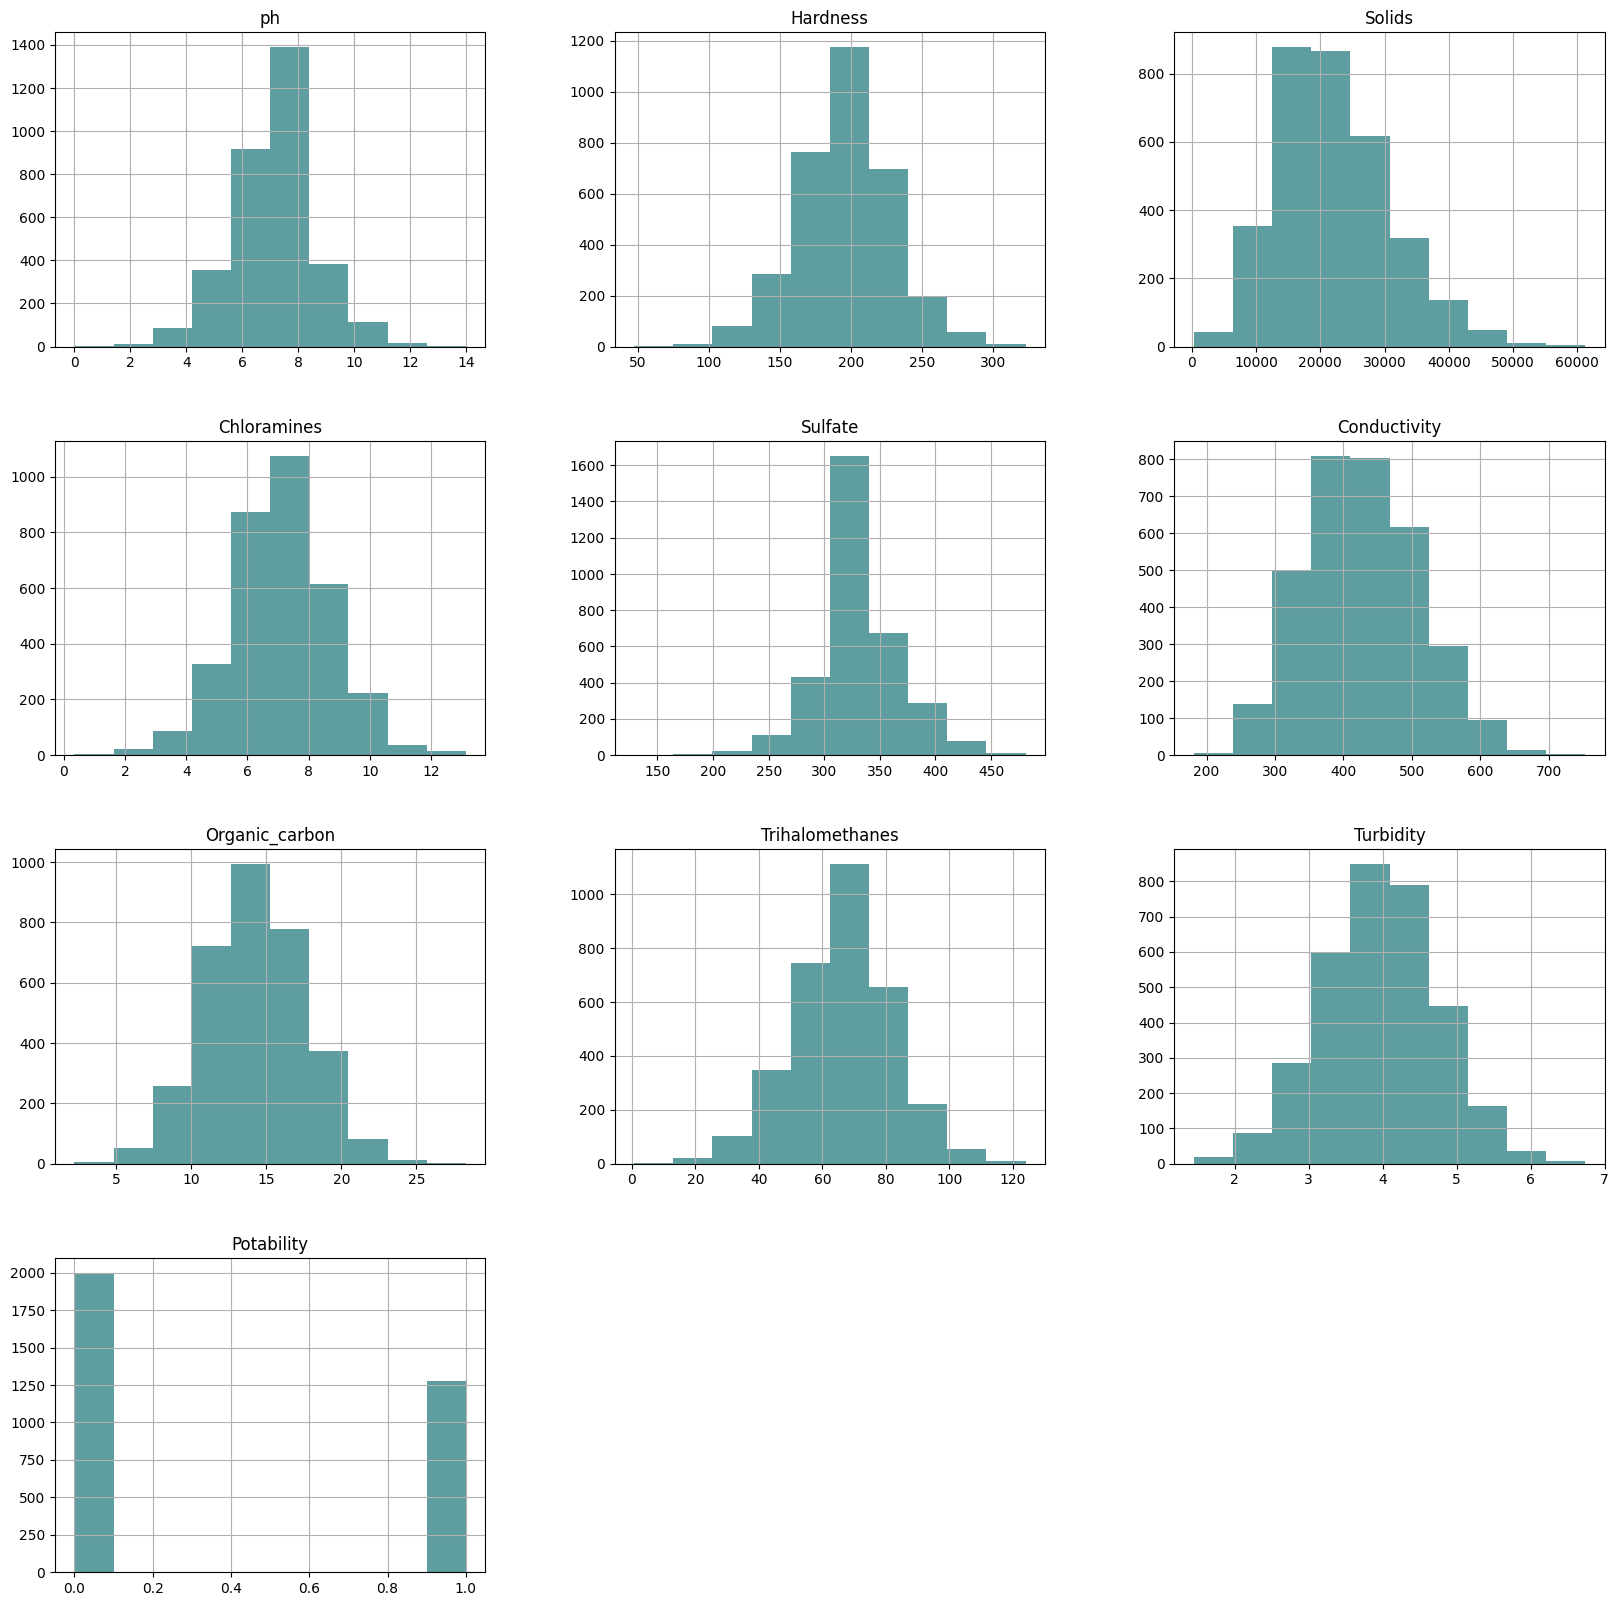

In [40]:
data_hist_plot = water_data.hist(figsize=(20,20), color='#5F9EA0')

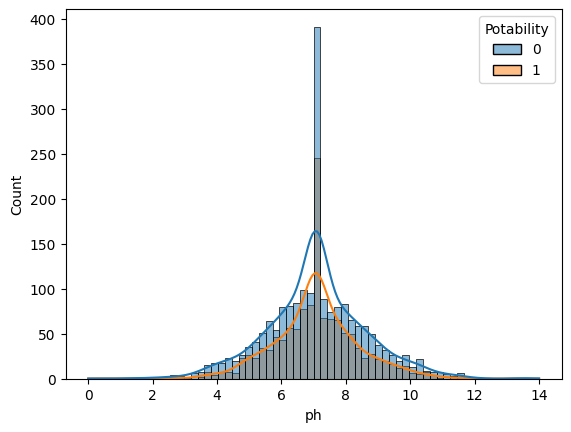

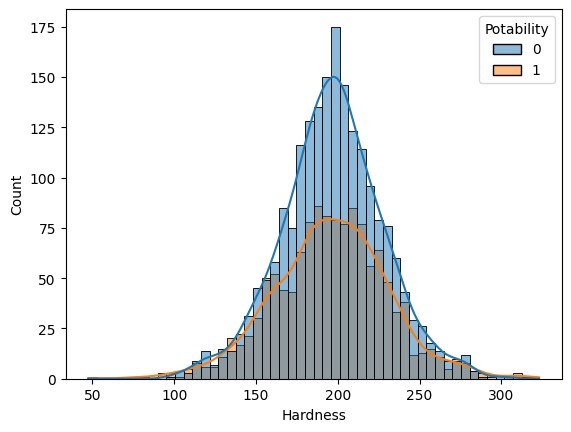

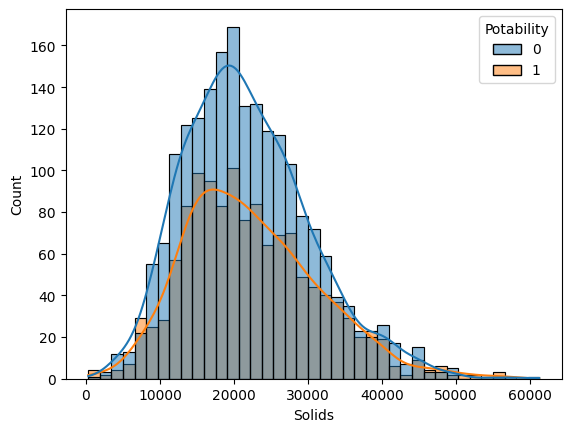

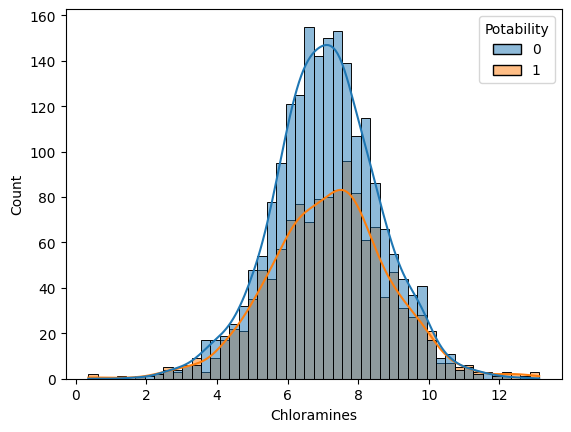

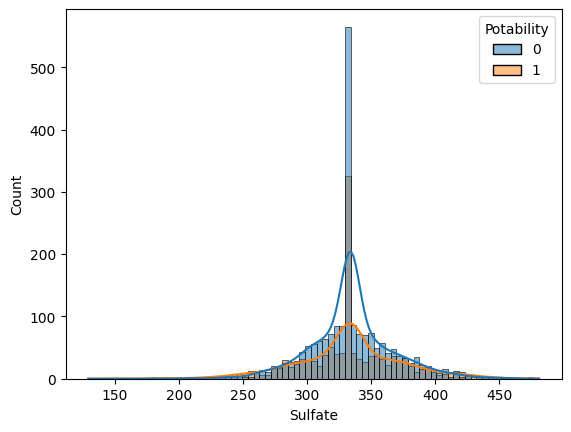

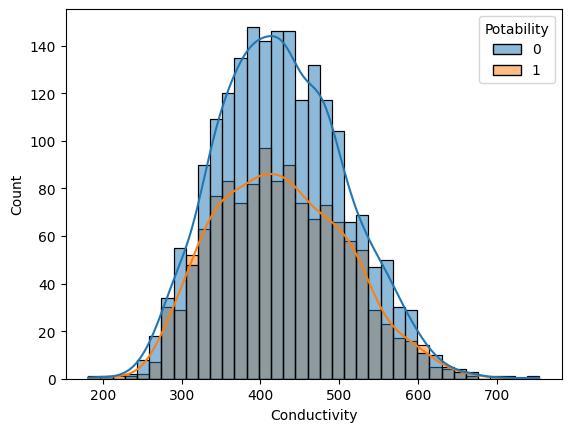

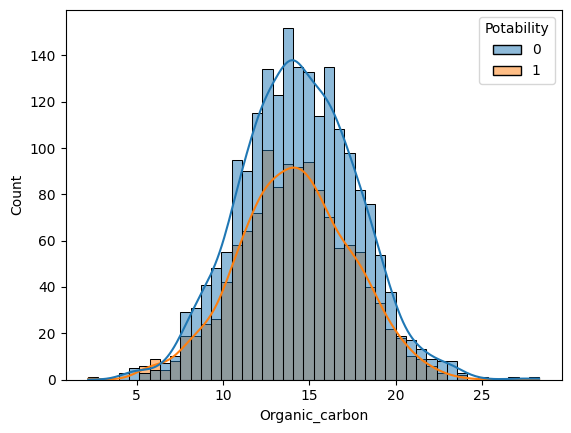

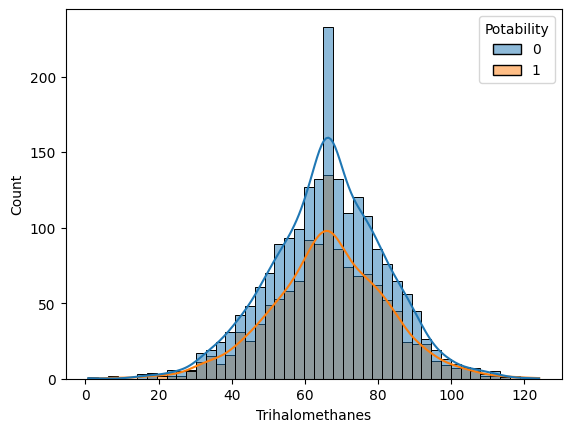

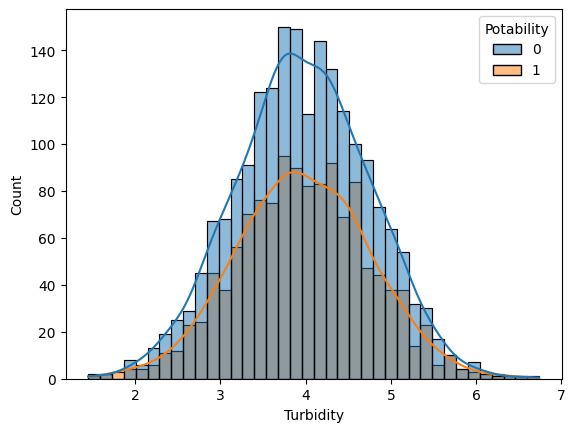

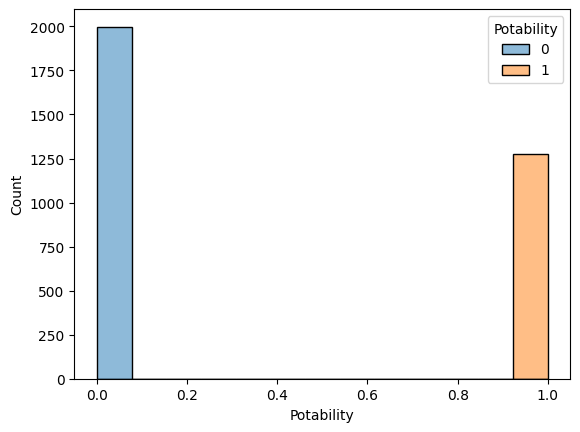

In [43]:

for col in water_data.columns:
  sns.histplot(data = water_data,x=col, kde=True, hue='Potability')
  plt.show()

In [44]:
water_data.groupby('Potability').mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


above, we can't find significant column by comparing mean of potability.

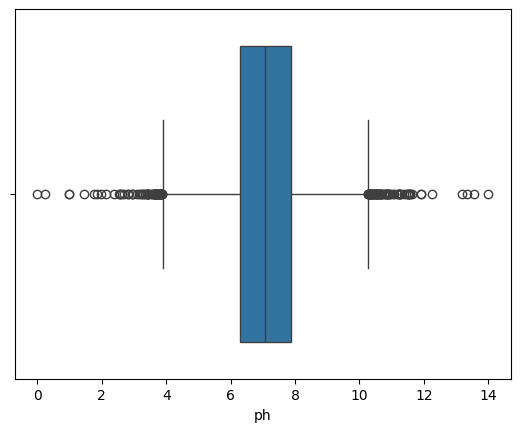

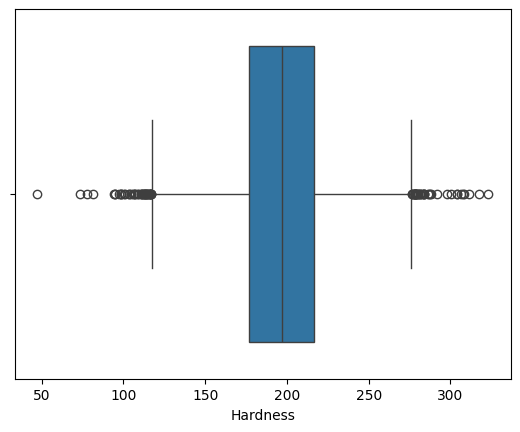

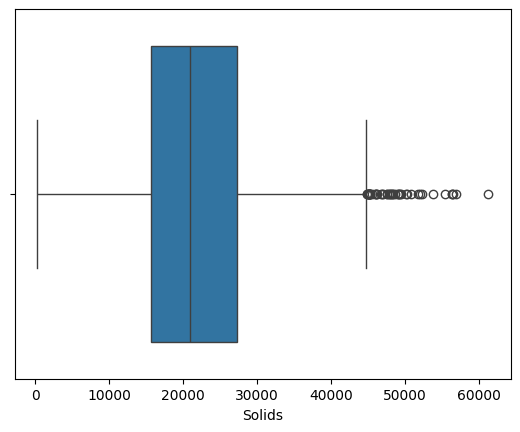

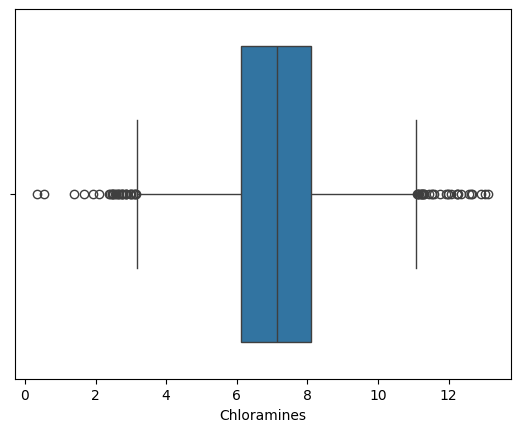

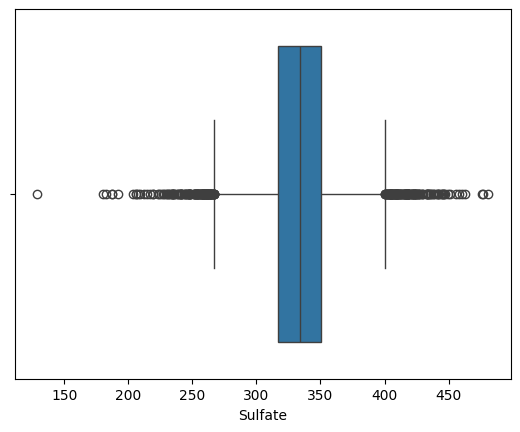

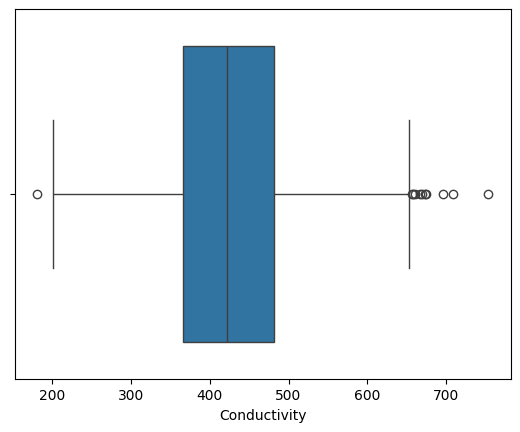

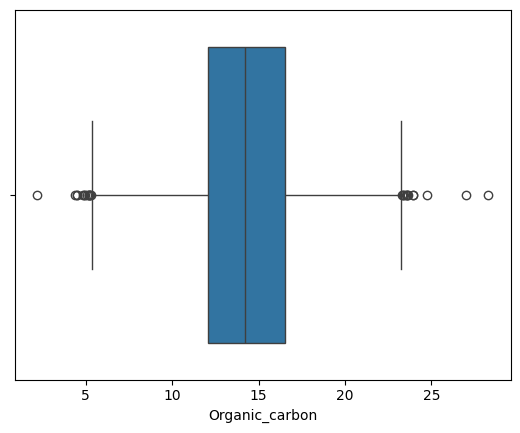

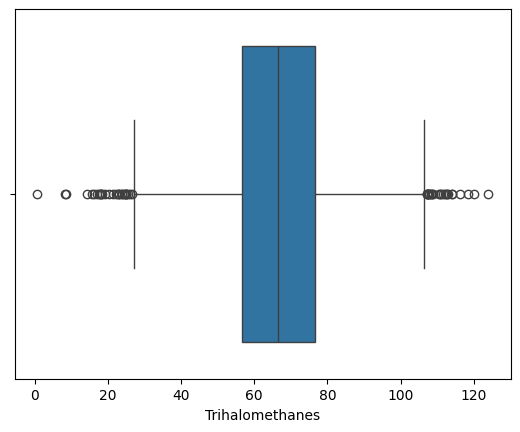

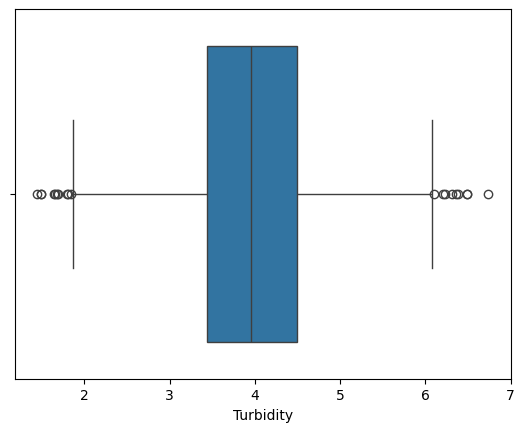

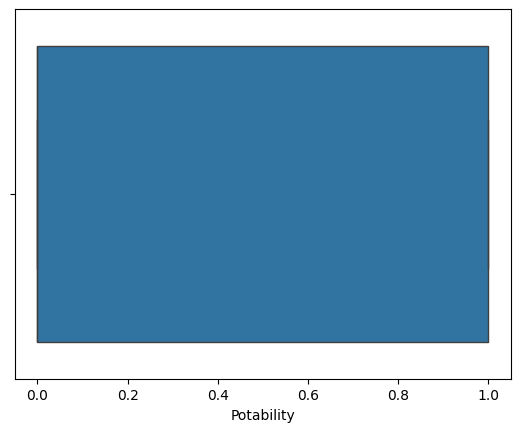

In [45]:
for col in water_data.columns:
  sns.boxplot(data=water_data, x=col)
  plt.show()

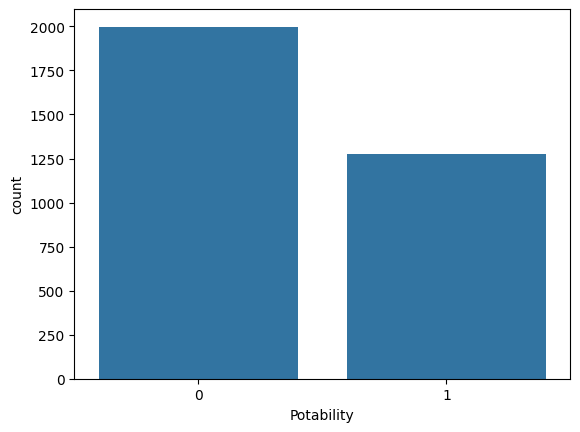

In [46]:
sns.countplot(data=water_data, x='Potability')
plt.show()

### Data Preprocessing

In [47]:
# splitting data into dependent and independent
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']


In [48]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [49]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


### Feature Scalling

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [51]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

### Training and Testing Dataset:

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
X_train.shape, X_test.shape

((2620, 9), (656, 9))

## Model Development

List of Models
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Extra Trees classifier
5. Support Vector classifier
6. K neighbors classifier
7. Gradient Boosting Classifier
8. Naive-Bayes
9. AdaBoost Classifier

**Importing Models ▶**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

**Creating the object of the models**

In [55]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
NB = GaussianNB()
ABC = AdaBoostClassifier()

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
models = [LR, DT, RF, ETC, SVM, KNN, GBC, NB, ABC]
features = X_scaled
labels = y
CV = 5
accu_list = []   # Accuracy List
ModelName = []   # Model Name List

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  accu_list.append(accuracies.mean()*100)
  ModelName.append(model_name)

  model_acc_df = pd.DataFrame({'Model':ModelName, 'Cross_Val_Accuracy':accu_list})
  model_acc_df

In [58]:
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.967697
2,RandomForestClassifier,62.851331
3,ExtraTreesClassifier,63.859570
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.539285
7,GaussianNB,61.263871
8,AdaBoostClassifier,61.019177


In [59]:
from sklearn.metrics import classification_report

In [60]:
# using 3 models for classification report with the highest accuracy
SVM.fit(X_train, y_train)
ETC.fit(X_train, y_train)
RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)
y_pred_svm = SVM.predict(X_test)
y_pred_etc = ETC.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       400
           1       0.60      0.32      0.42       256

    accuracy                           0.65       656
   macro avg       0.63      0.59      0.59       656
weighted avg       0.64      0.65      0.62       656



In [62]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.69      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



In [63]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       400
           1       0.65      0.27      0.38       256

    accuracy                           0.66       656
   macro avg       0.66      0.59      0.57       656
weighted avg       0.66      0.66      0.61       656



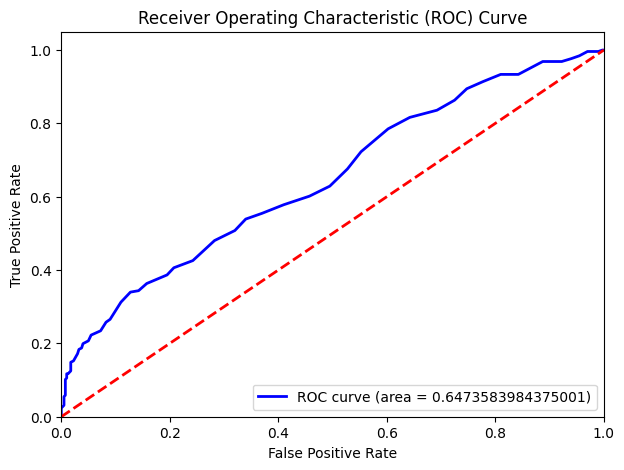

In [64]:
from sklearn.metrics import roc_curve, auc
y_scores = ETC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

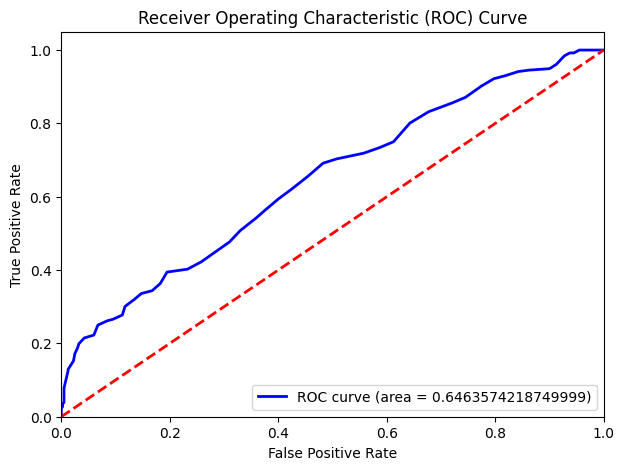

In [65]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We have selcted Random Forest Model

In [68]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF = {'min_samples_split': [2,6],
             'min_samples_leaf': [1, 4],
             'n_estimators': [100,200,300],
             'criterion': ['gini', 'entropy']
             }

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=params_RF,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=2,
                               scoring='accuracy',
                               return_train_score=True)

GridSearchCV_RF.fit(X_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print('Best Hyperparameters for Random Forest are = ' ,best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are =  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [69]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=6, n_estimators=200)

In [70]:
# checking accuracy after refining the model
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred_best = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.63      0.30      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



accuracy has increased from 65 to 66 % now.

In [71]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)}%')

Accuracy of Random Forest Model = 65.85%


## Building Predictive System

In [72]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [73]:
list1 = water_data.iloc[2:3, 0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [74]:
ph = float(input('Enter the value of pH: '))
Hardness = float(input('Enter the value of Hardness: '))
Solids = float(input('Enter the value of Solids: '))
Chloramines = float(input('Enter the value of Chloramines: '))
Sulfate = float(input('Enter the value of Sulfate: '))
Conductivity = float(input('Enter the value of Conductivity: '))
Organic_carbon = float(input('Enter the value of Organic_carbon: '))
Trihalomethanes = float(input('Enter the value of Trihalomethanes: '))
Turbidity = float(input('Enter the value of Turbidity: '))

Enter the value of pH: 8.1
Enter the value of Hardness: 224.5
Enter the value of Solids: 19000
Enter the value of Chloramines: 9.5
Enter the value of Sulfate: 335
Enter the value of Conductivity: 420
Enter the value of Organic_carbon: 17
Enter the value of Trihalomethanes: 66.5
Enter the value of Turbidity: 3.5


In [75]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]


In [76]:
water_data_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

array([[ 0.69346369,  0.85568742, -0.34379065,  1.50218488,  0.03387719,
        -0.07678478,  0.8208317 ,  0.00657728, -0.59824187]])

In [77]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

array([0])

In [78]:
if model_prediction == 0:
  print('Water is not safe for consumption')
else:
  print('Water is safe for consumption')

Water is not safe for consumption


-------------------------------------------------------------------------------------------

predicting using function ▶

In [79]:
def Water_Quality_Prediction(input_data):
  scaled_data = std_scaler.transform([input_data])
  model_prediction = best_estimator.predict(scaled_data)
  if model_prediction[0] == 0:
    print('Water is not safe for consumption')
  else:
    print('Water is safe for consumption')

In [80]:
ph = float(input('Enter the value of pH: '))
Hardness = float(input('Enter the value of Hardness: '))
Solids = float(input('Enter the value of Solids: '))
Chloramines = float(input('Enter the value of Chloramines: '))
Sulfate = float(input('Enter the value of Sulfate: '))
Conductivity = float(input('Enter the value of Conductivity: '))
Organic_carbon = float(input('Enter the value of Organic_carbon: '))
Trihalomethanes = float(input('Enter the value of Trihalomethanes: '))
Turbidity = float(input('Enter the value of Turbidity: '))

input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]

Water_Quality_Prediction(input_data)

Enter the value of pH: 7.654
Enter the value of Hardness: 240
Enter the value of Solids: 14245
Enter the value of Chloramines: 6.28
Enter the value of Sulfate: 373
Enter the value of Conductivity: 416
Enter the value of Organic_carbon: 10.46
Enter the value of Trihalomethanes: 85.85
Enter the value of Turbidity: 2.43
Water is safe for consumption
